## LGBM & XGBM

### Objective:
##### The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 


### Exploratory Data Analysis (EDA):

##### 1) Load the Titanic dataset using Python's pandas library.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

In [102]:
df=pd.read_csv('diabetes (1).csv')

In [103]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
df.shape

(768, 9)

##### 2) Check for missing values.

In [105]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [106]:
### There are no missing values

In [107]:
df.duplicated().sum()

0

In [108]:
### There are no duplicate values

In [109]:
### Checking outliers
df.boxplot()

<Axes: >

In [110]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

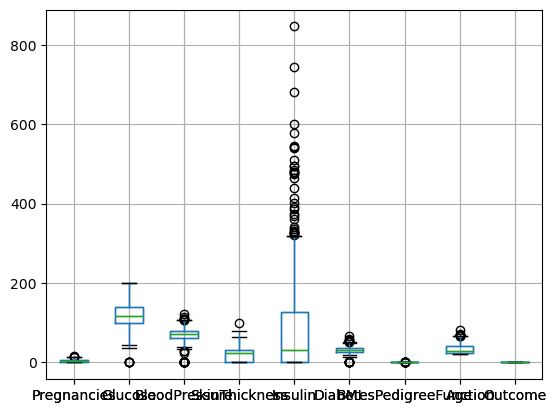

In [111]:
df.boxplot()
plt.show()

##### 3) Explore data distributions using histograms and box plots.

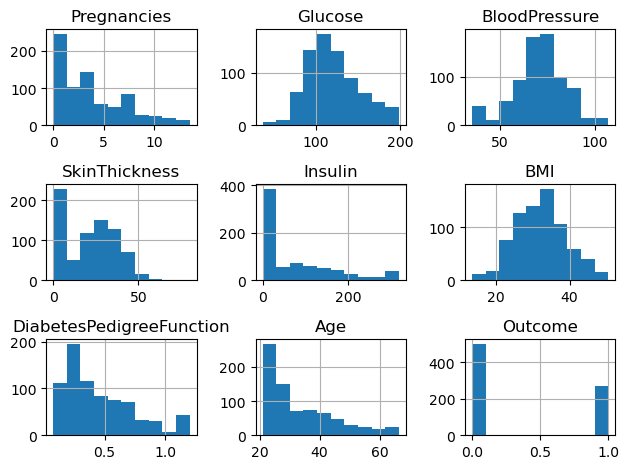

In [112]:
### histogram
df.hist()
plt.tight_layout()
plt.show()

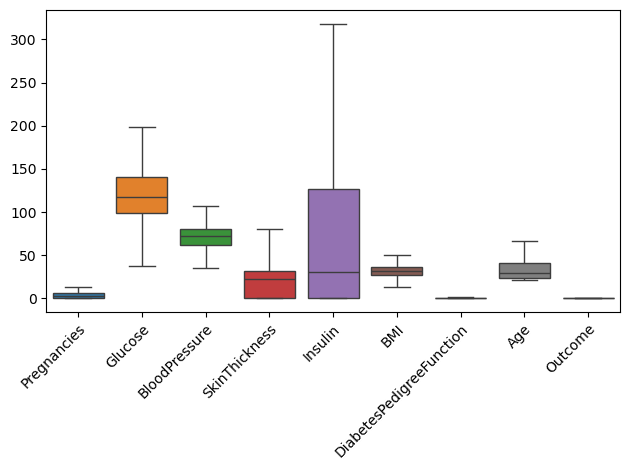

In [113]:
### boxplot
sns.boxplot(data=df)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
plt.tight_layout() # Adjusts subplot params for tight layout
plt.show()

##### 4) Visualize relationships between features and survival using scatter plots and bar plots.

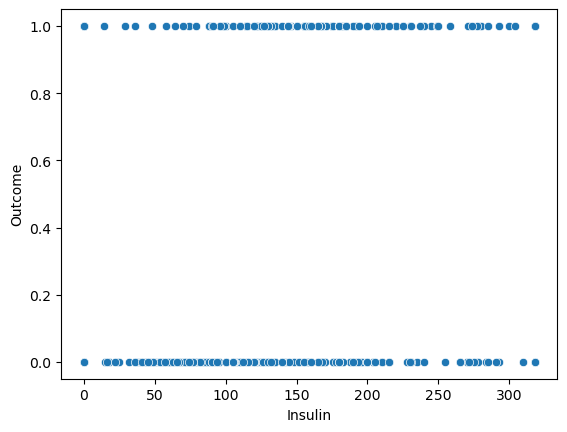

In [177]:
sns.scatterplot(data=df,x='Insulin',y='Outcome')
plt.show()

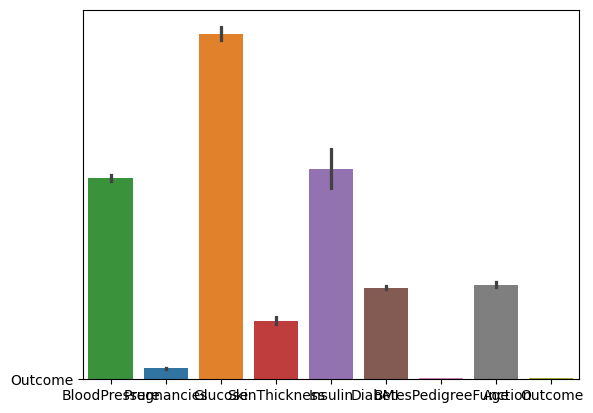

In [181]:
sns.barplot(data=df)
plt.show()

#### 1) Impute missing values.

In [114]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [115]:
### There are no missing values, so there is no need for imputation

##### 2) Encode categorical variables using one-hot encoding or label encoding. 

In [116]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [117]:
### There is no categorical variable to encode. All are integer or float values. So there is no need to use One-Hot encoding or label encoding

##### 3) If needed you can apply more preprocessing methods on the given dataset.

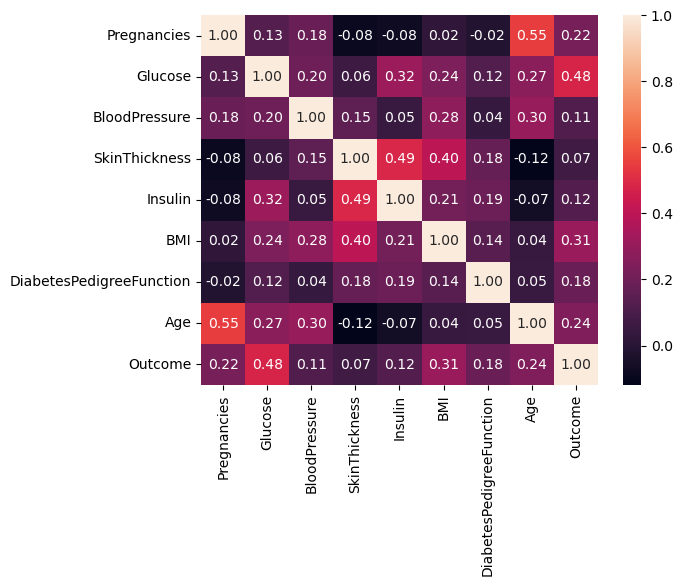

<Figure size 1000x600 with 0 Axes>

In [118]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')
plt.figure(figsize=(10,6))
plt.show()

In [119]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


In [120]:
target=df[['Outcome']]
features=df.drop(columns=['Outcome'])

In [121]:
target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [122]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [123]:
f_clas=f_classif(features,target)
f_clas

(array([ 39.1060998 , 228.27899638,   9.96114593,   4.11804863,
         12.10361486,  81.28714654,  27.13587638,  47.94475658]),
 array([6.66677148e-10, 2.46195991e-45, 1.66135754e-03, 4.27732832e-02,
        5.31674632e-04, 1.53959123e-18, 2.43985294e-07, 9.28460495e-12]))

In [124]:
features.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [125]:
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False)

Glucose                     228.278996
BMI                          81.287147
Age                          47.944757
Pregnancies                  39.106100
DiabetesPedigreeFunction     27.135876
Insulin                      12.103615
BloodPressure                 9.961146
SkinThickness                 4.118049
dtype: float64

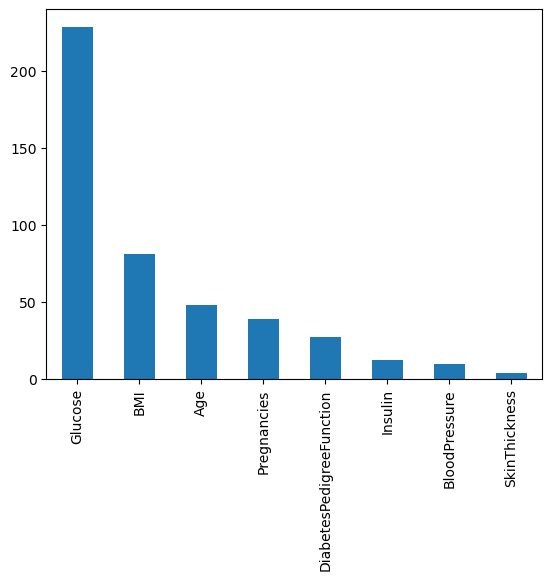

In [126]:
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [127]:
features.drop(columns=['SkinThickness','BloodPressure','Insulin'],inplace=True)

In [128]:
features.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,33.6,0.627,50.0
1,1.0,85.0,26.6,0.351,31.0
2,8.0,183.0,23.3,0.672,32.0
3,1.0,89.0,28.1,0.167,21.0
4,0.0,137.0,43.1,1.200,33.0


In [129]:
std_sca=StandardScaler()

In [130]:
features[['Pregnancies','Glucose','BMI','Age']]=std_sca.fit_transform(features[['Pregnancies','Glucose','BMI','Age']])

In [131]:
features.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.861926,0.209359,0.627,1.445691
1,-0.848970,-1.159433,-0.784254,0.351,-0.189304
2,1.245598,1.984903,-1.252672,0.672,-0.103252
3,-0.848970,-1.031093,-0.571337,0.167,-1.049828
4,-1.148194,0.508990,1.557835,1.200,-0.017199


### Building Predictive Models:

##### 1) Split the preprocessed dataset into training and testing sets.

In [132]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 5)
(192, 5)
(576, 1)
(192, 1)


##### 2) Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
##### 3) Build predictive models using LightGBM and XGBoost algorithms.
##### 4) Train the models on the training set and evaluate their performance on the testing set.

##### LGBM

In [133]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [134]:
lgb=lgb.LGBMClassifier(n_estimators=200,learning_rate=0.2,subsample=1.0,max_features=1,random_state=50,
                       reg_alpha=10,reg_lambda =10,min_child_weight=2,max_bins=10,boosting_type='goss',bundling=True,
                       top_rate=0.2,other_rate=0.3)

In [135]:
lgb.fit(x_train,y_train)
y_pred=lgb.predict(x_test)
accuracy_score(y_test,y_pred)

[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: bundling
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 201, number of negative: 375
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in th

0.765625

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       125
           1       0.69      0.60      0.64        67

    accuracy                           0.77       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.76      0.77      0.76       192



##### XGBM

In [137]:
import xgboost as xgb

In [138]:
xgb=xgb.XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=1.0,max_features=1,random_state=50,
                      reg_alpha=10,reg_lambda=10,min_child_weight=2)

In [139]:
xgb.fit(x_train,y_train)
y_pred1=xgb.predict(x_test)
accuracy_score(y_test,y_pred1)

0.8072916666666666

In [140]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       125
           1       0.80      0.60      0.68        67

    accuracy                           0.81       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.81      0.81      0.80       192



##### 5) Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [141]:
### Hyper parameter tuning for LGBM classifier

In [142]:
import lightgbm as lgm

In [143]:
params = {'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.2,0.5,1],'reg_alpha':[5,10,20],
       'reg_lambda':[5,10,20],'min_child_weight':[1,2,3,4]}

In [144]:
lgbm = lgm.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1)

In [145]:
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=params,
    scoring='roc_auc',
    cv=3,             
    verbose=2,
    n_jobs=-1
)

In [146]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[LightGBM] [Info] Number of positive: 201, number of negative: 375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,estimator,LGBMClassifie...ndom_state=42)
,param_grid,"{'learning_rate': [0.1, 0.2, ...], 'min_child_weight': [1, 2, ...], 'n_estimators': [50, 100, ...], 'reg_alpha': [5, 10, ...], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [147]:
grid_search.best_params_

{'learning_rate': 0.5,
 'min_child_weight': 4,
 'n_estimators': 50,
 'reg_alpha': 10,
 'reg_lambda': 20}

In [148]:
lgb=lgm.LGBMClassifier(learning_rate=0.5,min_child_weight=4,n_estimators=50,reg_alpha=10,reg_lambda=20)

In [149]:
lgb.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 201, number of negative: 375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.5
,n_estimators,50
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,4
,min_child_samples,20


In [150]:
y_pred_lgb=lgb.predict(x_test)

In [151]:
accuracy_score(y_pred_lgb,y_test)

0.7864583333333334

In [152]:
print(classification_report(y_pred_lgb,y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       144
           1       0.55      0.77      0.64        48

    accuracy                           0.79       192
   macro avg       0.73      0.78      0.75       192
weighted avg       0.82      0.79      0.80       192



In [153]:
### Hyper parameter tuning for XGBoost Classifier

In [154]:
import xgboost as xgb

In [155]:
xgb=xgb.XGBClassifier(n_estimators=200,learning_rate=0.2,subsample=1.0,max_features=1,random_state=50,
                      reg_alpha=10,reg_lambda=10,min_child_weight=2)

In [156]:
params={'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.2,0.5,1],'reg_alpha':[5,10,20],
       'reg_lambda':[5,10,20],'min_child_weight':[1,2,3,4]}

In [157]:
grid_search=GridSearchCV(xgb,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'learning_rate': 1,
 'min_child_weight': 2,
 'n_estimators': 50,
 'reg_alpha': 5,
 'reg_lambda': 10}

In [159]:
import xgboost as xgb

In [160]:
xgb=xgb.XGBClassifier(n_estimators=50,learning_rate=1,subsample=1.0,max_features=1,random_state=50,
                      reg_alpha=5,reg_lambda=10,min_child_weight=2)

In [161]:
xgb.fit(x_train,y_train)
y_pred1=xgb.predict(x_test)
accuracy_score(y_test,y_pred1)

0.765625

In [162]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       125
           1       0.68      0.61      0.65        67

    accuracy                           0.77       192
   macro avg       0.74      0.73      0.74       192
weighted avg       0.76      0.77      0.76       192



### Comparative Analysis:

##### 1) Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

##### 2) Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

In [163]:
conf_lgbm=confusion_matrix(y_pred_lgb,y_test)
conf_lgbm

array([[114,  30],
       [ 11,  37]], dtype=int64)

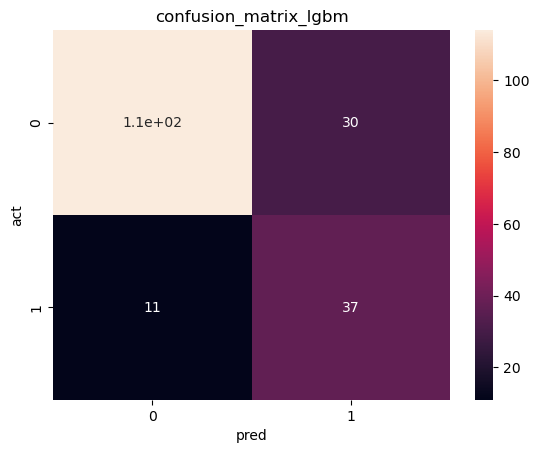

In [164]:
sns.heatmap(conf_lgbm,annot=True)
plt.xlabel('pred')
plt.ylabel('act')
plt.title('confusion_matrix_lgbm')
plt.show()

In [165]:
conf_xgbm=confusion_matrix(y_pred1,y_test)
conf_xgbm

array([[106,  26],
       [ 19,  41]], dtype=int64)

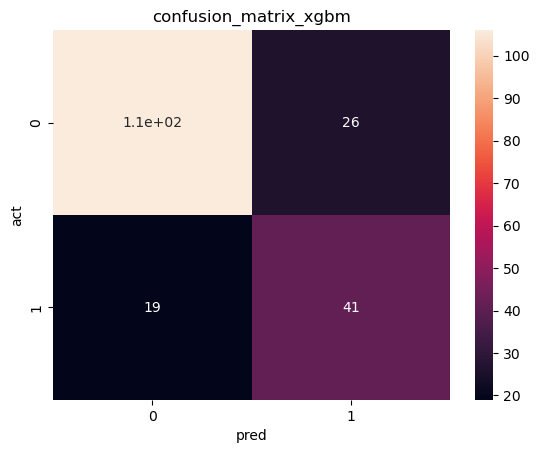

In [166]:
sns.heatmap(conf_xgbm,annot=True)
plt.xlabel('pred')
plt.ylabel('act')
plt.title('confusion_matrix_xgbm')
plt.show()

### Strength of LGBM
1) Faster Training speed
2) Lower memory usage
### Weaknesses of LGBM
1) Prone to overfitting on small data
2) High dimensional data concerns

### Strength of XGBM
1) High performance and accuracy
2) Handles missing values
### Weaknesses of XGBM
1) Slower training speed
2) High memory consumption